In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from pprint import pprint

In [2]:
#pip install --upgrade pip

In [3]:
df = pd.read_excel("Raisin_Dataset/Raisin_Dataset.xlsx")
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [ ]:
## Framework for data analysis
## Part 1
    - EDA
        1. Dimensions of the data
        2. Data Types
        3. Missing Values
        4. Basic Statistics
        5. Outliers

    - Class Distribution

    - Univariate Analysis

    - Bivariate Analysis

    - Feature Engineering

    - Modeling
        1. split into train and test
        2. Grid search cv
        3. 
    - Evaluation on test data
        
        

## EDA
----

1. Data Types
2. Missing Values
3. Basic Statistics

In [7]:
len(df)

900

In [10]:
df.dtypes

Area                 int64
MajorAxisLength    float64
MinorAxisLength    float64
Eccentricity       float64
ConvexArea           int64
Extent             float64
Perimeter          float64
Class               object
dtype: object

In [11]:
## Missing values

In [8]:
df.isnull().mean() * 100

Area               0.0
MajorAxisLength    0.0
MinorAxisLength    0.0
Eccentricity       0.0
ConvexArea         0.0
Extent             0.0
Perimeter          0.0
Class              0.0
dtype: float64

In [12]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


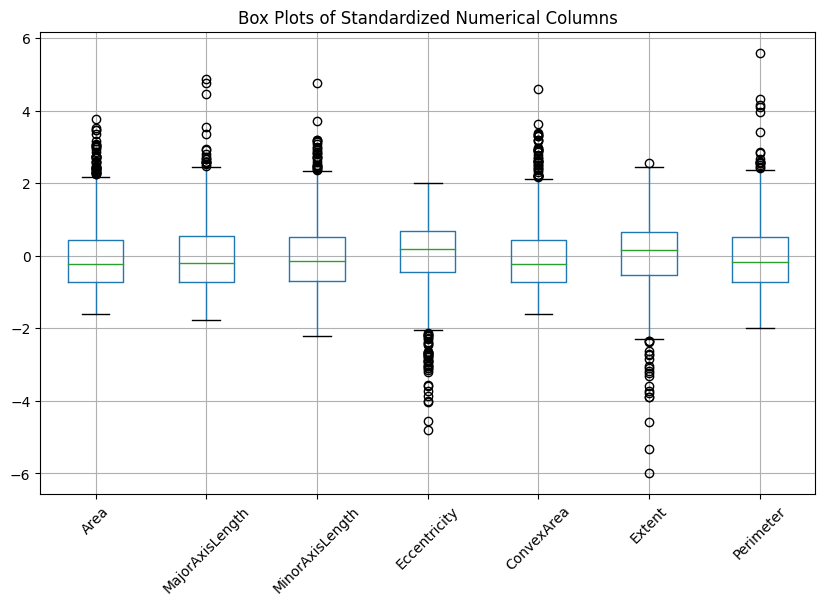

In [25]:
# Perform Standardization
df_standardized = (df.iloc[:,:-1] - df.iloc[:,:-1].mean()) / df.iloc[:,:-1].std()

# Create box plots for the standardized data
df_standardized.boxplot(figsize=(10, 6))
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.title('Box Plots of Standardized Numerical Columns')
plt.show()

In [34]:
# % of values outside of IQR

outlier_percentages = {}

for col in df.select_dtypes(include=['number']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_percentage = len(outliers)*100/len(df)

    outlier_percentages[col] = outlier_percentage

pprint(outlier_percentages)
print("\n\n")

outliers = {}

## Calculation by z-score
for column in df.select_dtypes(include=['number']).columns:
    # Calculate the Z-scores for the column
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    
    # Identify outliers (using a threshold of 3)
    outliers[column] = df[z_scores > 3]

    # Print the percentage of outliers for this column
    percentage_outliers = (len(outliers[column]) / len(df)) * 100
    print(f"{column}: {percentage_outliers:.2f}% outliers")
    




{'Area': 4.555555555555555,
 'ConvexArea': 4.666666666666667,
 'Eccentricity': 4.777777777777778,
 'Extent': 2.3333333333333335,
 'MajorAxisLength': 1.8888888888888888,
 'MinorAxisLength': 2.888888888888889,
 'Perimeter': 1.8888888888888888}



Area: 1.22% outliers
MajorAxisLength: 0.56% outliers
MinorAxisLength: 0.78% outliers
Eccentricity: 1.67% outliers
ConvexArea: 1.11% outliers
Extent: 1.44% outliers
Perimeter: 0.67% outliers


In [27]:
#### Things to consider

 # - If within 5% it is reasonable to ignore
 # - Use models that handle outliers (like tree based ones)
 # - Investigate the outliers
 # - Transform the data 
 # - Remove the outliers

------------

## 2. Class Distribution

In [35]:
df['Class'].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

----

## 3. Univariate Analysis

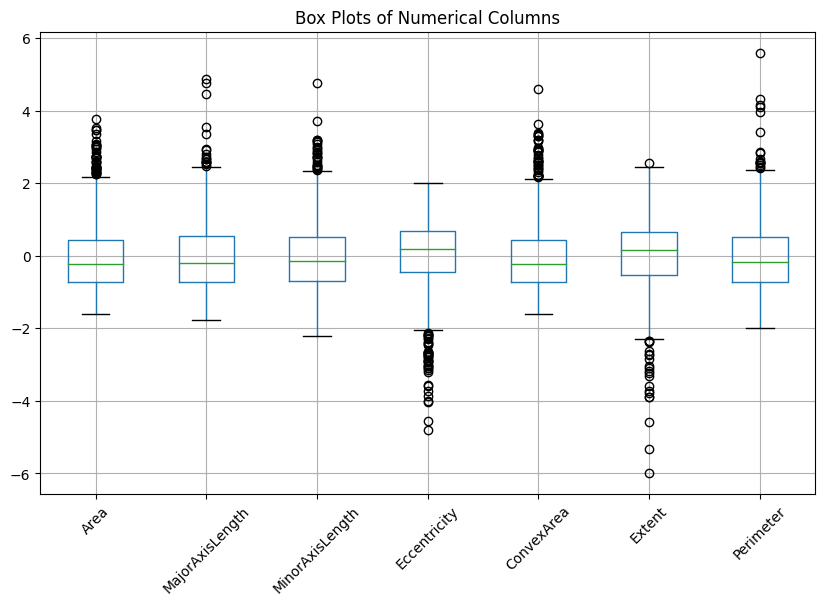

In [38]:

# Perform Standardization
df_standardized = (df.iloc[:,:-1] - df.iloc[:,:-1].mean()) / df.iloc[:,:-1].std()

df_standardized.boxplot(figsize=(10, 6))  # Create box plots for all numerical columns
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.title('Box Plots of Numerical Columns')
plt.show()

## 4. Multivariate Analysis

In [40]:
df.iloc[:,:-1].corr()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
Area,1.000000,0.932774,0.906650,0.336107,0.995920,-0.013499,0.961352
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,-0.203866,0.977978
MinorAxisLength,0.906650,0.728030,1.000000,-0.027683,0.895651,0.145322,0.827417
Eccentricity,0.336107,0.583608,-0.027683,1.000000,0.348210,-0.361061,0.447845
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,-0.054802,0.976612
Extent,-0.013499,-0.203866,0.145322,-0.361061,-0.054802,1.000000,-0.173449
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,-0.173449,1.000000


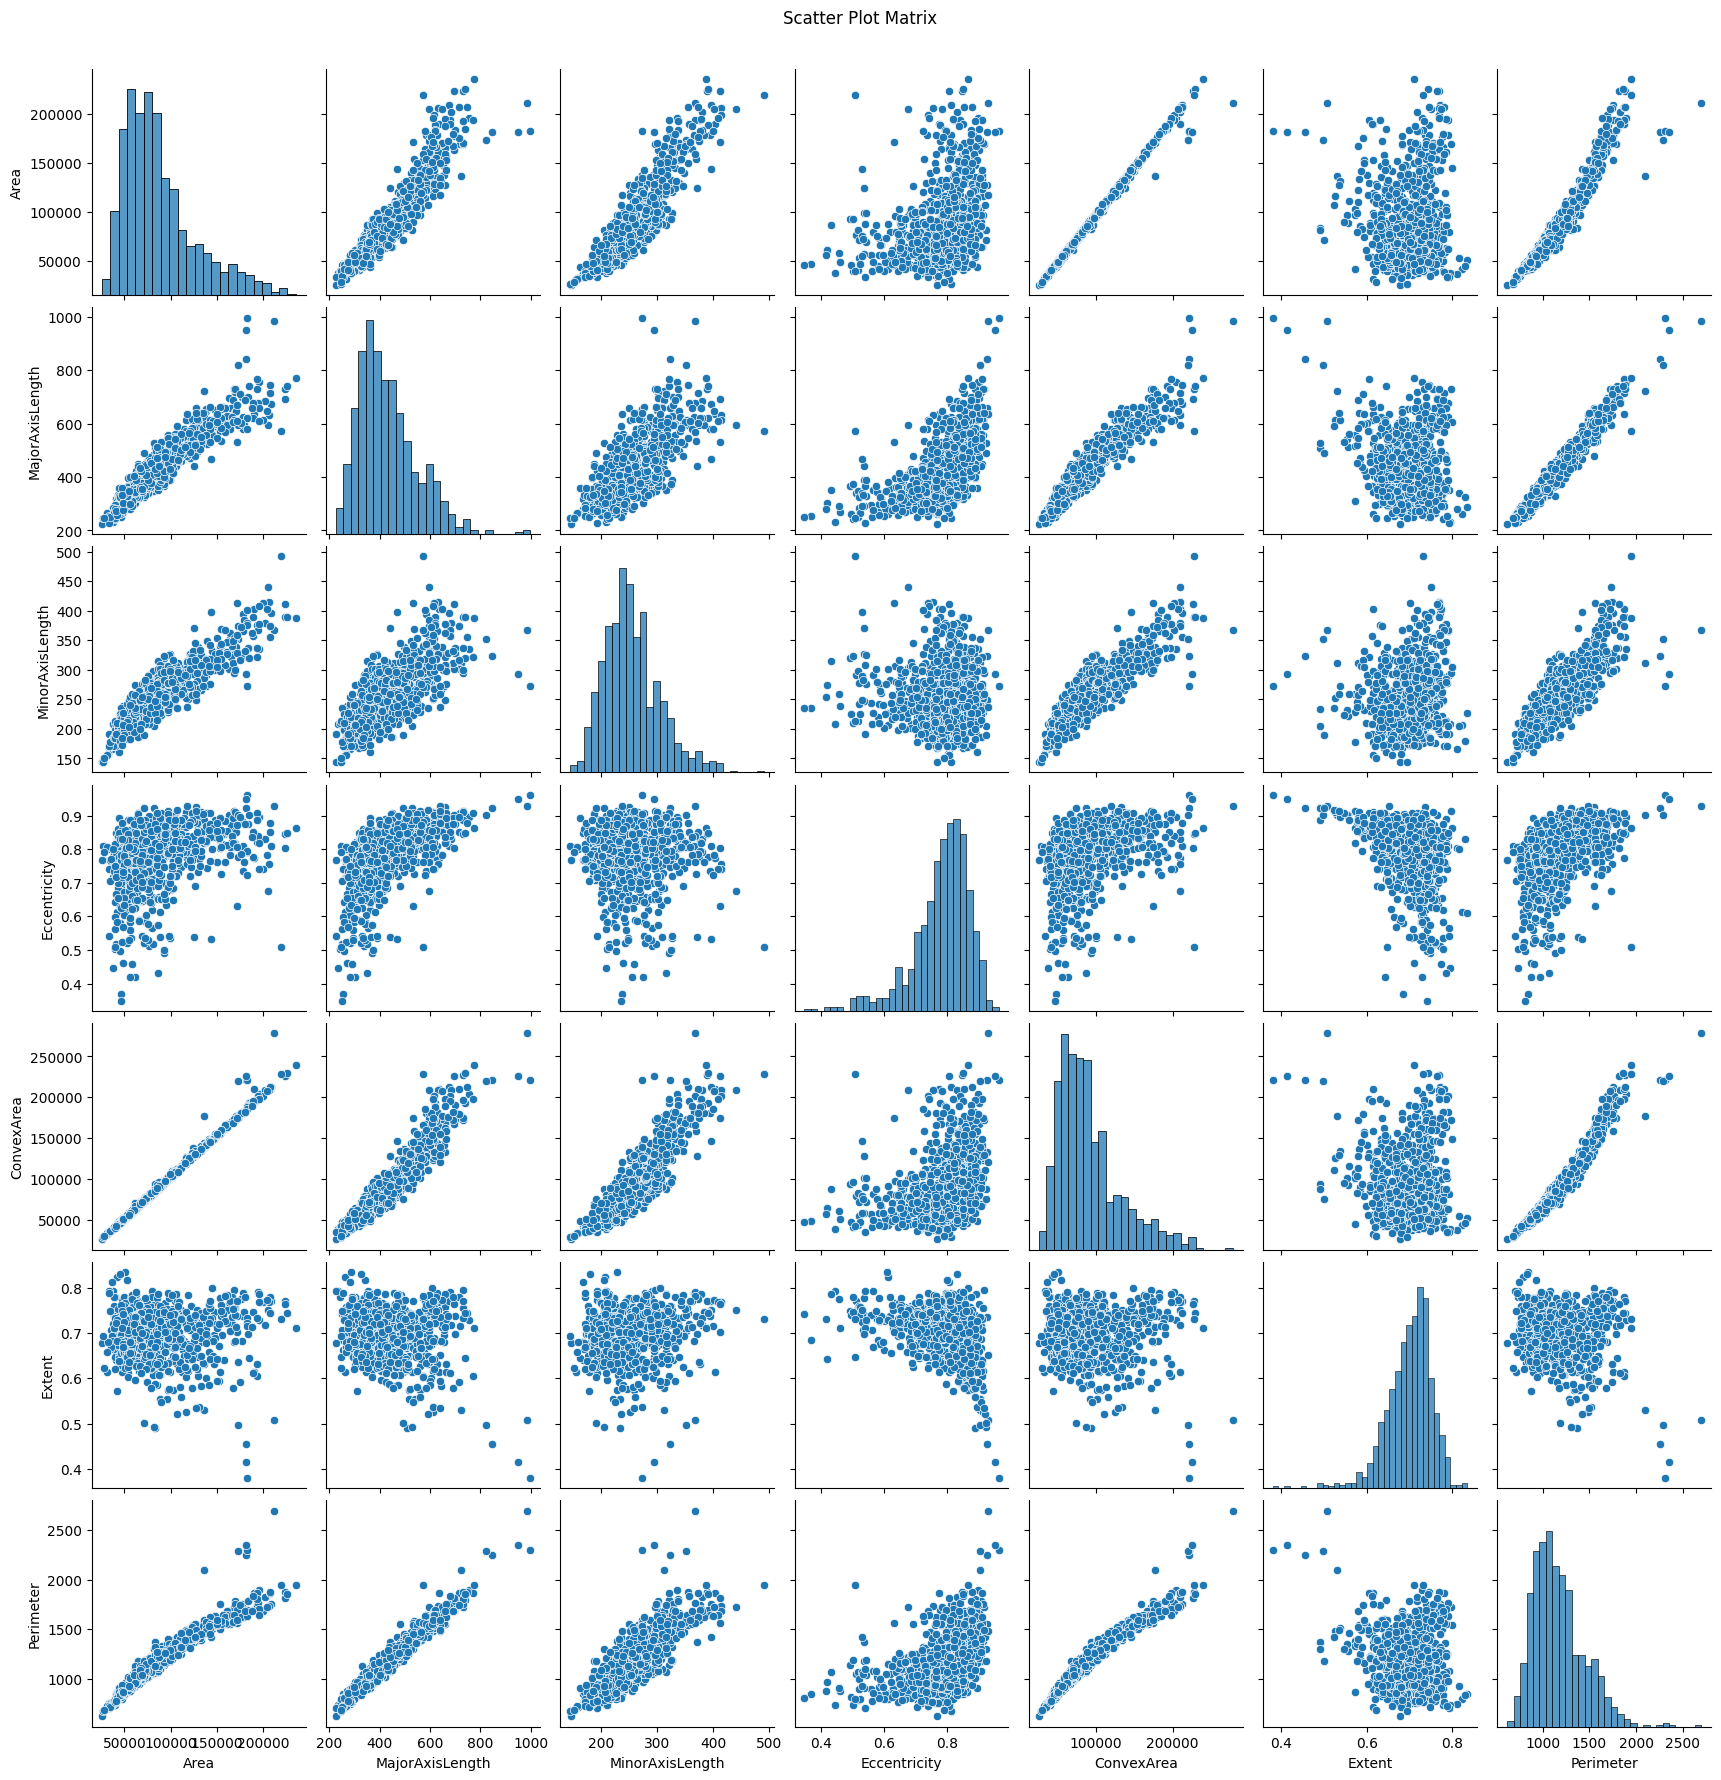

In [41]:
numerical_columns = df.select_dtypes(include=['number'])
sns.pairplot(numerical_columns)
plt.suptitle('Scatter Plot Matrix', y=1.02)  # Title with some padding
plt.show()

In [42]:
## Variance Inflation Factor

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [44]:
numerical_columns = df.select_dtypes(include=['number'])
X = add_constant(numerical_columns)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

           Feature          VIF
0            const  1125.800042
1             Area   404.718824
2  MajorAxisLength   129.152882
3  MinorAxisLength    40.166637
4     Eccentricity     5.210356
5       ConvexArea   445.947568
6           Extent     1.605335
7        Perimeter   184.252844


In [45]:
## Variables with high VIF (above 10) are highly correlated with one or more other features

## Model
----

In [51]:
df.iloc[:,-1]

0      Kecimen
1      Kecimen
2      Kecimen
3      Kecimen
4      Kecimen
        ...   
895      Besni
896      Besni
897      Besni
898      Besni
899      Besni
Name: Class, Length: 900, dtype: object

In [62]:
from sklearn.ensemble import RandomForestClassifier


# Assume 'Target' is your target variable
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

# Train a Random Forest model
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

           Feature  Importance
1  MajorAxisLength    0.235970
6        Perimeter    0.230229
0             Area    0.157050
4       ConvexArea    0.147253
3     Eccentricity    0.086679
2  MinorAxisLength    0.078170
5           Extent    0.064650


## Cross Validation and HyperParameter Selection
----

In [65]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
# Doing a cross validation

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()

rf_params_grid = {
    'n_estimators' : [10, 20, 30],
    'max_depth' : [5, 7, 10]
}

xgb_params_grid = {
    'n_estimators' : [10, 20, 30],
    'max_depth' : [5, 7, 10]    
}

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_params_grid, scoring='accuracy')
rf_grid_search.fit(X.values, y)

xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_params_grid, scoring='accuracy')
xgb_grid_search.fit(X.values, y)

rf_grid_search.best_score_ , xgb_grid_search.best_score_

[23:51:59] WARNING: /private/var/folders/gh/tdqdcp611d5c7yv0b0np772c0000gn/T/pip-install-nrpw6hnn/xgboost_d4d7bdeebe5e418aaf6d61c258664662/build/temp.macosx-12.0-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:59] WARNING: /private/var/folders/gh/tdqdcp611d5c7yv0b0np772c0000gn/T/pip-install-nrpw6hnn/xgboost_d4d7bdeebe5e418aaf6d61c258664662/build/temp.macosx-12.0-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:51:59] WARNING: /private/var/folders/gh/tdqdcp611d5c7yv0b0np772c0000gn/T/pip-install-nrpw6hnn/xgboost_d4d7bdeebe5e418aaf6d61c258664662/build/temp.macosx-12.0-arm64-3.9/xgboost/sr

(0.8688888888888888, 0.861111111111111)

In [68]:
rf_grid_search.best_estimator_

RandomForestClassifier(max_depth=7, n_estimators=20)